## Problem Set 4
### MACS 30100, Dr. Evans
### Leoson Hoay

**Importing necessary packages:**

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn as sk
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import math
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt

c:\users\leoso\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\leoso\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Problem (1) 
**Multiple Linear Regression**

**(a)**

In [2]:
# identifying NA values as '?'
auto_df = pd.read_csv("../../../ProblemSets/PS4/Auto.csv", na_values = "?")

In [3]:
auto_df.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


**(b)**

<IPython.core.display.Javascript object>


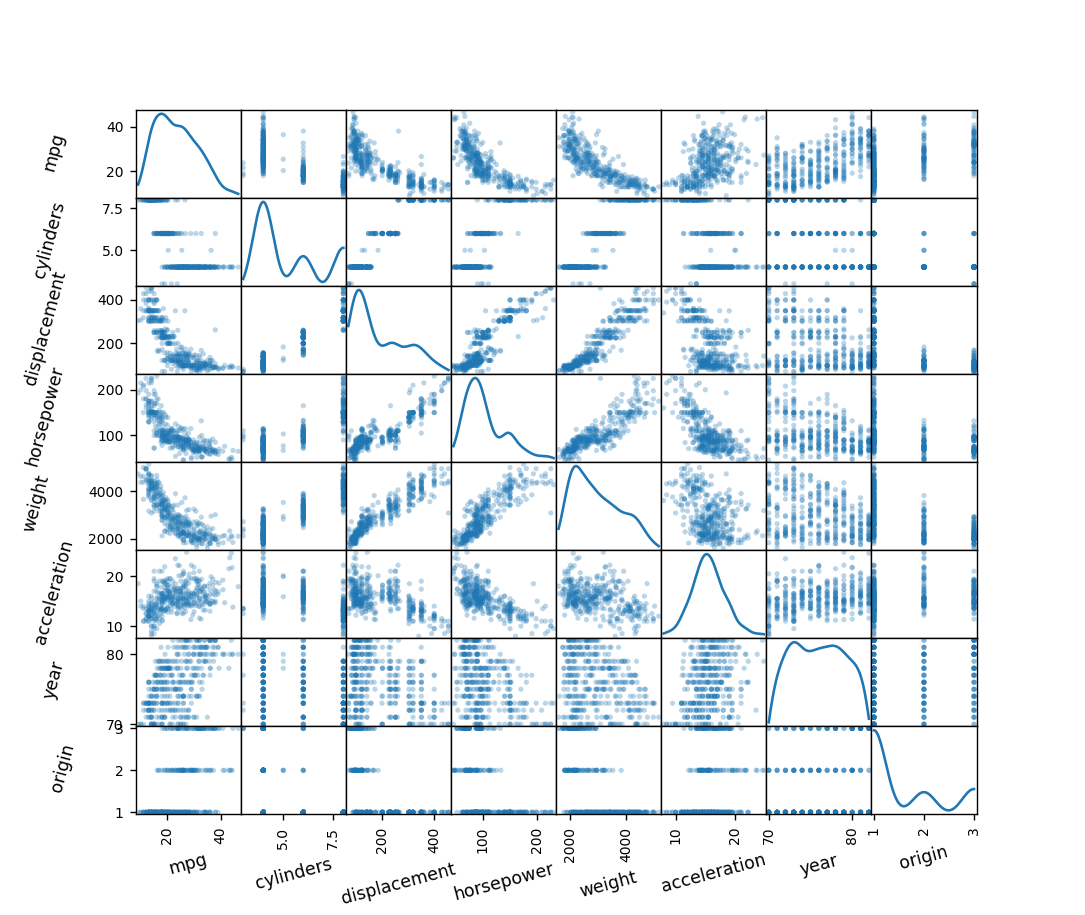

In [4]:
%matplotlib notebook
axs = scatter_matrix(auto_df, alpha=0.3, figsize =(6,6), diagonal='kde')
# rotate labels for visibility
n = len(auto_df.columns)
for x in range(n-1):
    for y in range(n-1):
        ax = axs[x, y]  
        ax.xaxis.label.set_rotation(15) 
        ax.yaxis.label.set_rotation(75)
        ax.yaxis.labelpad = 25

**(c)**

In [5]:
auto_df.corr('pearson', 1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


**(d)**

In [6]:
# adding intercept term
auto_df['const'] = 1

In [7]:
reg1 = sm.OLS(auto_df['mpg'], auto_df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin']], missing='drop')

In [8]:
results1 = reg1.fit()

In [9]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        23:43:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**(i)**

**$\beta_2$ (displacement), $\beta_4$ (weight), $\beta_6$ (year), and $\beta_7$ (origin)** are statistically significant at the 1% level. 

**(ii)**

**$\beta_1$ (cylinders), $\beta_3$ (horsepower), and $\beta_5$ (acceleration)** are not statistically significant at the 10% level.

**(iii)**

A **single unit change in the year variable (1 year)** results in a corresponding **~0.75 unit change in mpg (miles per gallon)**, all else kept constant.

**(e)**

From the scatterplot, it seems that **acceleration, horsepower, and displacement** are likely to have a non-linear relationship with mpg.

**(i)**

In [10]:
auto_df['displacement_squared'] = auto_df['displacement'].apply(lambda x: x**2)
auto_df['horsepower_squared'] = auto_df['horsepower'].apply(lambda x: x**2)
auto_df['weight_squared'] = auto_df['weight'].apply(lambda x: x**2)
auto_df['acceleration_squared'] = auto_df['acceleration'].apply(lambda x: x**2)

In [11]:
reg2 = sm.OLS(auto_df['mpg'], auto_df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin', 'displacement_squared', 
                                       'horsepower_squared', 'weight_squared', 'acceleration_squared']], missing='drop')

In [12]:
results2 = reg2.fit()

In [13]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        23:43:47   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.1084 

**(ii)**

The adjusted R-squared in (e) is **0.866**, which is **greater than the original statistic of 0.818 in part (d)**.

**(iii)**

The displacement term became **not statistically significant at the 0.1% level (p-value ~ 0.408)**, while its coefficient changed from positive (0.0199) to negative (-0.-160). The significance of its squared term is also **not statistically significant (p-value ~0.532)**.

**(iv)**

The cylinders term became **less statistically significant (from p-value ~ 0.128 to p-value ~ 0.440)**.

**(f)**

In [14]:
results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])

array([38.7321111])

The predicted mpg of this particular vehicle would be **approximately 38.73 miles**.

### Problem (2) 
**Classification Problem: KNN by hand and in Python**

In [15]:
table_dict = {'x1' : [0, 2, 0 , 0, -1, 1],
              'x2' : [3, 0, 1, 1, 0, 1], 
              'x3' : [0, 0, 3, 2, 1, 1], 
              'y' : ['r', 'r', 'r', 'g', 'g', 'r']}

In [16]:
knn_df = pd.DataFrame(data = table_dict)
knn_df

,x1,x2,x3,y
0,0,3,0,r
1,2,0,0,r
2,0,1,3,r
3,0,1,2,g
4,-1,0,1,g
5,1,1,1,r


**(a)**

In [17]:
# applying Euclidean formula
knn_df['e_dist'] = np.sqrt(knn_df['x1']**2 + knn_df['x2']**2 + knn_df['x3']**2)
knn_df

,x1,x2,x3,y,e_dist
0,0,3,0,r,3.000000
1,2,0,0,r,2.000000
2,0,1,3,r,3.162278
3,0,1,2,g,2.236068
4,-1,0,1,g,1.414214
5,1,1,1,r,1.732051


In [18]:
knn_df['e_dist']

0    3.000000
1    2.000000
2    3.162278
3    2.236068
4    1.414214
5    1.732051
Name: e_dist, dtype: float64

**(b)**

In [19]:
knn_df.loc[:,'y':'e_dist']

,y,e_dist
0,r,3.000000
1,r,2.000000
2,r,3.162278
3,g,2.236068
4,g,1.414214
5,r,1.732051


At k = 1, we will take into account a single nearest neighbour to the point 0, 0, 0. **Since the euclidean distance is shortest to Observation 5 (row index 4, 1.414214)**, we predict Y to be **green**.

**(c)**

At k = 3, we will take into account the three nearest neighbours to the point 0, 0, 0. **Since the euclidean distance is shortest to Observation 5 (row index 4, 1.414214, y = g), Observation 6 (row index 5, 1.732051, y = r), and Observation 2, 2.000000, y = r), we predict Y to be red**, based on the mode of the 3 neighbours' observations on Y.

**(d)**

If the Bayes decision boundary is highly non-linear, a **smaller value of K would be better**, as it better fits a non-linear decision boundary that has high variance but lower bias. As K gets larger, the pattern produced will become more linear. 

**(e)**

In [20]:
y = knn_df['y']
x = np.column_stack((knn_df['x1'], knn_df['x2'], knn_df['x3']))
knn_classifier = sk.neighbors.KNeighborsClassifier(n_neighbors=2)
results3 = knn_classifier.fit(x, y)
print(results3.predict([(1, 1, 1)]))
# Check k = 2 case
print('')
print(knn_classifier.kneighbors([(1, 1, 1)]))

['g']

(array([[0.        , 1.41421356]]), array([[5, 3]], dtype=int32))


The KNN classifier of the test point is **green**, according to the predict method. However, since k = 2, and the point 1, 1, 1 is closer in euclidean distance to index 5 (observation 6, red), hence the predicted classifier should be **red**.

### Problem (3) 
**Multivariable logistic (logit) regression**

In [21]:
auto_df2 = auto_df.iloc[:, 0:10]
mpg_median = auto_df2['mpg'].median()
# create binary variable
auto_df2['mpg_high'] = auto_df2['mpg'].apply(lambda x: 1 if x >= mpg_median else 0)
mpg_median

23.0

In [22]:
auto_df2.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,const,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,1,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,1,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,1,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,1,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,1,0


**(a)**

In [23]:
LogitModel = sm.Logit(auto_df2['mpg_high'], auto_df2[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin']], missing = 'drop')
# to fix error where 'scipy.stats does not have module chisqprob'
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)
results4 = LogitModel.fit()
print(results4.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        23:43:47   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

Both the **weight** and **year** coefficients are statistically significant at the 5% level.

**(b)**

In [24]:
auto_df2 = auto_df2.dropna(axis = 0, how = 'any')
np_x = np.column_stack((auto_df2['const'], auto_df2['cylinders'], auto_df2['displacement'], auto_df2['horsepower'], auto_df2['weight'], 
                     auto_df2['acceleration'], auto_df2['year'], auto_df2['origin']))
X_train, X_test, y_train, y_test = train_test_split(np_x, auto_df2['mpg_high'], test_size = .5, random_state=10)

**(c)**

In [25]:
LogReg = LogisticRegression()
results5 = LogReg.fit(X_train, y_train)

In [26]:
results5.coef_

array([[-0.03144305, -0.32570882,  0.00034643, -0.05238895, -0.00491359,
        -0.18112262,  0.30945703, -0.09264595]])

My estimated intercept is **-0.03144305**, and the coefficients are **-0.32570882, 0.00034643, -0.05238895, -0.00491359, -0.18112262, 0.30945703, and -0.09264595** respectively.

**(d)**

In [27]:
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



Given the reported precision, the model predicts both mpg_high and mpg_low relatively **equally well**.